In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Q1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:

1.Which are the teams which started playing between 1930-1980?

2.Which are the top 5 teams in terms of points?

3.What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning            percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

4.Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [3]:
#Loading Dataset
df = pd.read_csv('Laliga.csv')

In [4]:
#Checking Top 5 rows
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [5]:
column = df.iloc[0]   #Extracting Column name from first Row

In [6]:
df.columns = column   #Assigning Column name to current unnamed columns

In [7]:
df.drop(index = 0 ,axis=1,inplace = True)   # Removing First Row

In [8]:
df.reset_index(drop=True,inplace=True)  # Resetting Index

In [9]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [10]:
# There is hyphen separating the years in Debut and Since/Last column. Let's remove these hyphens to make these columns 
# appropriate for arithmatic calculations

l1 = []
for i in df['Debut'].values:
    x = i.split('-')[0]
    l1.append(x)
df['Debut'] = l1
    
l2 = []
for i in df['Since/LastApp'].values:
    x = i.split('-')[0]
    l2.append(x)
df['Since/LastApp'] = l2

In [11]:
# Replace hyphens with Zero 

l = ['Seasons', 'Points', 'GamesPlayed', 'GamesWon','GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
     'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut']
df[l] = df[l].replace('-',0)

In [12]:
df.head()   #Checking if hyphen is removed

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [13]:
df.dtypes    #Checking Datatypes

0
Pos              object
Team             object
Seasons          object
Points           object
GamesPlayed      object
GamesWon         object
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debut            object
Since/LastApp    object
BestPosition     object
dtype: object

In [14]:
# All the numerical columns have datatypes as Objects, We need to change it to Numeric so as to make arithmatic calculations 
# on them

l= []
for i in df.columns:
    if i!= 'Team':
        l.append(i)

df[l] = df[l].astype('int64')

In [15]:
df.dtypes   # Again checking Datatypes to check if changes are visible in orignal dataframe

0
Pos               int64
Team             object
Seasons           int64
Points            int64
GamesPlayed       int64
GamesWon          int64
GamesDrawn        int64
GamesLost         int64
GoalsFor          int64
GoalsAgainst      int64
Champion          int64
Runner-up         int64
Third             int64
Fourth            int64
Fifth             int64
Sixth             int64
T                 int64
Debut             int64
Since/LastApp     int64
BestPosition      int64
dtype: object

##### 1.	Which are the teams which started playing between 1930-1980?

In [16]:
teams = df[(df['Debut'] > 1930) & (df['Debut'] < 1980)]['Team'].values

In [17]:
print('The Teams which started playing between 1930 and 1980 are:\n')
for i in teams:
    print(i,end='\n')

The Teams which started playing between 1930 and 1980 are:

Valencia
Sevilla
Zaragoza
Real Betis
Deportivo La Coruna
Celta Vigo
Valladolid
Sporting Gijon
Osasuna
Malaga
Oviedo
Mallorca
Las Palmas
Granada
Rayo Vallecano
Elche
Hercules
Tenerife
Murcia
Levante
Salamanca
Sabadell
Cadiz
Castellon
Cordoba
Recreativo
Burgos CF
Pontevedra
Gimnastic
Alcoyano
Jaen
AD Almeria
Lleida
Condal
Atletico Tetuan
Cultural Leonesa


##### 2.	Which are the top 5 teams in terms of points?

In [18]:
top_five_index = df['Points'].sort_values().nlargest(5).index
top_five = df.iloc[top_five_index,1].values
print('The Top Five teams in terms of Point are:\n')
for i in top_five:
    print(i,end='\n')

The Top Five teams in terms of Point are:

Real Madrid
Barcelona
Atletico Madrid
Valencia
Athletic Bilbao


##### 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [19]:
df['winning_per'] = df['GamesWon'] / df['GamesPlayed'] *100

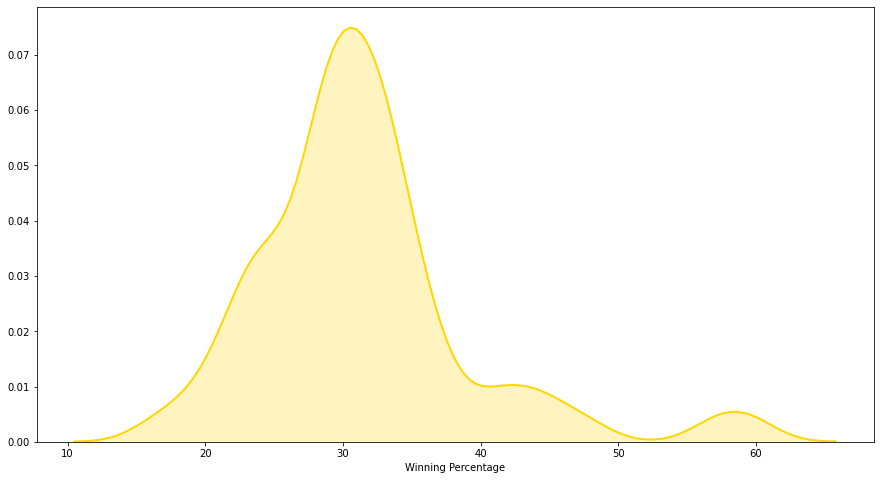

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(df['winning_per'],hist=False,kde_kws={'lw':2,'shade':True,'color':'gold'})
plt.xlabel('Winning Percentage')
plt.show()

##### Inference: 
The Distribution of Winning Percentage is Right Skewed indicating that few teams have very high winning percentage as compared to others

In [21]:
top_five_index = df['winning_per'].sort_values().nlargest(5).index
top_five = df.iloc[top_five_index,1].values
print('The Top Five teams in terms of Point are:\n')
for i in top_five:
    print(i,end='\n')

The Top Five teams in terms of Point are:

Real Madrid
Barcelona
Atletico Madrid
Valencia
Athletic Bilbao


##### 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

Here, We have to check if there is significant difference between Winning Percentage of teams with best Position 1-3 (Group 1)
and 4-7 (Group 2);
According to situation give Two sampmle two tailed t test is to be performed.

##### Null and Alternate hypothesis for the test are given below

H0 : There is no significant difference between Winning Percentage of both the groups (Mean Winning Percentage Group1 = Mean Winning Percentage Group2)

H1 : There is significant difference between Winning Percentage of both the groups (Mean Winning Percentage Group1 != Mean Winning Percentage Group2)
    

In [22]:
# Dividing the data into two Groups
G1 = df[(df['BestPosition'] == 1) | (df['BestPosition'] == 2) | (df['BestPosition'] == 3)]['winning_per']
G2 = df[(df['BestPosition'] == 4) | (df['BestPosition'] == 5) | (df['BestPosition'] == 6) | (df['BestPosition'] == 7) ]['winning_per']

In [23]:
# Checking For Normality of Group 1
t_stat , p_val = stats.shapiro(G1)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 0.8252524733543396
P Value is 0.003532945876941085


As P Value is less than 0.05, The Group 1 does not follow Normal Distribution.

In [24]:
# Checking For Normality of Group 2
t_stat , p_val = stats.shapiro(G2)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 0.9436671733856201
P Value is 0.2809881269931793


As P Value is greater than 0.05, The Group 2  follows Normal Distribution.

In [25]:
# Checking for equal Variance
t_stat , p_val = stats.levene(G1,G2)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 8.724629449043212
P Value is 0.0055024902317928875


As P Value is less than 0.05, The Two groups under consideration dont have equal Variance

As, One of the group doesnt follow normal distribution and also two groups under consideration dont have equal Variance,
We can not perform parametric Test.

In [26]:
# Non-Parametric Test (MannWhiteneyu)

t_stat , p_val = stats.mannwhitneyu(G1,G2)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 11.0
P Value is 4.1876636593687686e-07


P Values is very less than 0.05, Hence We rejact Null Hypothesis.

##### Inference:  We can see the p value is very vary less than 0.05 , so we can confidently say that there is significsnt difference in Winning Percentage of teams with best Position 1-3 (Group 1) and 4-7 (Group 2).

### 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

d)	Which of the two above intervals are wider?

e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


##### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [27]:
sd = 25
xbar = 140
n = 200
se = sd/np.sqrt(n)
print('The estimated Standard Error is ', se)

The estimated Standard Error is  1.7677669529663687


##### Standard error statistics measure how accurate and precise the sample is as an estimate of the population parameter

##### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [28]:
u, l =stats.norm.interval(0.95,xbar,se)
print('95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma is between {} and {}'.format(u,l))

95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma is between 136.5352404391258 and 143.4647595608742


##### c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [29]:
sd = 25
xbar = 140
n = 100
se = sd/np.sqrt(n)
print('The estimated Standard Error is ', se)
u, l =stats.norm.interval(0.95,xbar,se)
print('''After changing sample size to 100, 95% confidence interval for the true mean blood pressure for all 60-year old women 
with glaucoma is between {} and {}'''.format(u,l))

The estimated Standard Error is  2.5
After changing sample size to 100, 95% confidence interval for the true mean blood pressure for all 60-year old women 
with glaucoma is between 135.10009003864985 and 144.89990996135015


##### d)	Which of the two above intervals are wider?

The second interval with lesser sample size is wider becuase of lesser sample size the standard error is more

##### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, 
the sample means cluster more and more around the true population mean.

### 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


##### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

H0 : There is NO significant difference between driving distance of old and New balls (Mean distance covered by Current ball = Mean distance covered by New Ball)

H1 : There is significant difference between driving distance of old and New balls (Mean distance covered by Current ball != Mean distance covered by New Ball)

##### 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [30]:
df = pd.read_csv('Golf.csv')
old = df['Current']
new = df['New']

In [31]:
# Checking For Normality of distribution of old 
t_stat , p_val = stats.shapiro(old)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 0.9707046747207642
P Value is 0.378787100315094


As P Value is more than 0.05, The Data Old follows Normal Distribution.

In [32]:
# Checking For Normality of Group 2
t_stat , p_val = stats.shapiro(new)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 0.9678263664245605
P Value is 0.3064655363559723


As P Value is more than 0.05, The Data New follows Normal Distribution.

In [33]:
# Checking for equal Variance
t_stat , p_val = stats.levene(old,new)
print('T statistics is',t_stat)
print('P Value is', p_val)

T statistics is 0.2553238291765741
P Value is 0.6147759523331309


As P Value is more than 0.05, The Two groups under consideration have equal Variance

##### As both the samples follow Normal Distrubution and also have equal variance, Hence we can perform Parametric test

In [34]:
t_stat , p_val = stats.ttest_ind(old,new)
print('P Value is for the test is', p_val)

P Value is for the test is 0.18793228491854663


##### Conclusion : As p_value is more than 0.05, We fail to reject Null Hypothesis. We can conclude that there is NO significant difference between driving distance of old and New balls.

#### Recomendation : It is recomended to Par inc that they shoud go ahead with the production of new ball.

##### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [35]:
xbar_old = old.mean()
sd_old = np.std(old,ddof=1)
n= 40
se = sd_old/np.sqrt(n)
u, l =stats.norm.interval(0.95,xbar_old,se)
print('95% confidence interval for population mean of Current ball distance covered is between {} and {}'.format(u,l))

95% confidence interval for population mean of Current ball distance covered is between 267.56247173951107 and 272.9875282604889


In [36]:
xbar_new = new.mean()
sd_new = np.std(new,ddof=1)
n= 40
se = sd_new/np.sqrt(n)
u, l =stats.norm.interval(0.95,xbar_new,se)
print('95% confidence interval for population mean of Current ball distance covered is between {} and {}'.format(u,l))

95% confidence interval for population mean of Current ball distance covered is between 264.43297388933604 and 270.56702611066396


In [37]:
xbar_diff = xbar_old - xbar_new
sd_mean_diff = np.sqrt((df['Current'].var(ddof=1)) + (df['New'].var(ddof=1)))
se_mean_diff = sd_mean_diff/np.sqrt(n)
se_mean_diff

2.08903962108466

In [38]:
sd_mean_diff

13.212246649925271

In [39]:
stats.t.interval(0.95,loc=xbar_diff,scale=se_mean_diff,df=n-1)

(-1.4504814558217243, 7.000481455821679)